In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('fifa_ols.csv', index_col=0)
df.head()

,Name,Age,Nation_C,Club_V,Club_N,Overall,Potential,Position_Class,Value,Wage,Special,International Reputation,Skill Moves,Joined,Loaned From,Contract Valid Until,Age_C,Over_C,Special_C,WR
0,L. Messi,31,0,3,16,94,94,3,110500000.0,565000.0,2202,5.0,4.0,"Jul 1, 2004",NaN,2021,6,18,1,2.0
1,Cristiano Ronaldo,33,2,3,15,94,94,3,77000000.0,405000.0,2228,5.0,5.0,"Jul 10, 2018",NaN,2022,7,18,1,2.0
2,Neymar Jr,26,0,3,14,92,93,3,118500000.0,290000.0,2143,5.0,5.0,"Aug 3, 2017",NaN,2022,4,17,1,3.0
3,De Gea,27,2,3,13,91,93,0,72000000.0,260000.0,1471,4.0,1.0,"Jul 1, 2011",NaN,2020,5,16,0,2.0
4,K. De Bruyne,27,2,3,13,91,92,2,102000000.0,355000.0,2281,4.0,4.0,"Aug 30, 2015",NaN,2023,5,16,1,4.0


In [3]:
df.columns

Index(['Name', 'Age', 'Nation_C', 'Club_V', 'Club_N', 'Overall', 'Potential',
       'Position_Class', 'Value', 'Wage', 'Special',
       'International Reputation', 'Skill Moves', 'Joined', 'Loaned From',
       'Contract Valid Until', 'Age_C', 'Over_C', 'Special_C', 'WR'],
      dtype='object')

In [4]:
df['Loaned From'].fillna(0,inplace=True)

In [5]:
def Loaned(df):
    if (df['Loaned From']==0):
        return 1
    else:
        return 0
df['Loaned']=df.apply(Loaned,axis=1)

In [6]:
df['Joined'] = pd.to_datetime(df['Joined'])

In [7]:
# 클럽 v넣기
df1=df[['Club_V','Position_Class', 'Value', 'Wage','International Reputation',
       'Age_C', 'Over_C', 'Special_C','Loaned','Joined']]
df1.head()

,Club_V,Position_Class,Value,Wage,International Reputation,Age_C,Over_C,Special_C,Loaned,Joined
0,3,3,110500000.0,565000.0,5.0,6,18,1,1,2004-07-01
1,3,3,77000000.0,405000.0,5.0,7,18,1,1,2018-07-10
2,3,3,118500000.0,290000.0,5.0,4,17,1,1,2017-08-03
3,3,0,72000000.0,260000.0,4.0,5,16,0,1,2011-07-01
4,3,2,102000000.0,355000.0,4.0,5,16,1,1,2015-08-30


In [8]:
import datetime as dt
today = dt.datetime(2018,12,31)
df1['Period']= today - df1.Joined
df1['Period']=df1['Period'].apply(lambda x: round((x.days+1)/365,1))
df1.head()

,Club_V,Position_Class,Value,Wage,International Reputation,Age_C,Over_C,Special_C,Loaned,Joined,Period
0,3,3,110500000.0,565000.0,5.0,6,18,1,1,2004-07-01,14.5
1,3,3,77000000.0,405000.0,5.0,7,18,1,1,2018-07-10,0.5
2,3,3,118500000.0,290000.0,5.0,4,17,1,1,2017-08-03,1.4
3,3,0,72000000.0,260000.0,4.0,5,16,0,1,2011-07-01,7.5
4,3,2,102000000.0,355000.0,4.0,5,16,1,1,2015-08-30,3.3


In [9]:
df1.drop('Joined', axis=1, inplace=True)

In [10]:
genius=df1[df1.Wage>21000]
genius.head()

,Club_V,Position_Class,Value,Wage,International Reputation,Age_C,Over_C,Special_C,Loaned,Period
0,3,3,110500000.0,565000.0,5.0,6,18,1,1,14.5
1,3,3,77000000.0,405000.0,5.0,7,18,1,1,0.5
2,3,3,118500000.0,290000.0,5.0,4,17,1,1,1.4
3,3,0,72000000.0,260000.0,4.0,5,16,0,1,7.5
4,3,2,102000000.0,355000.0,4.0,5,16,1,1,3.3


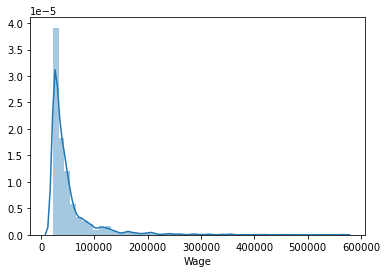

In [11]:
sns.distplot(genius.Wage)

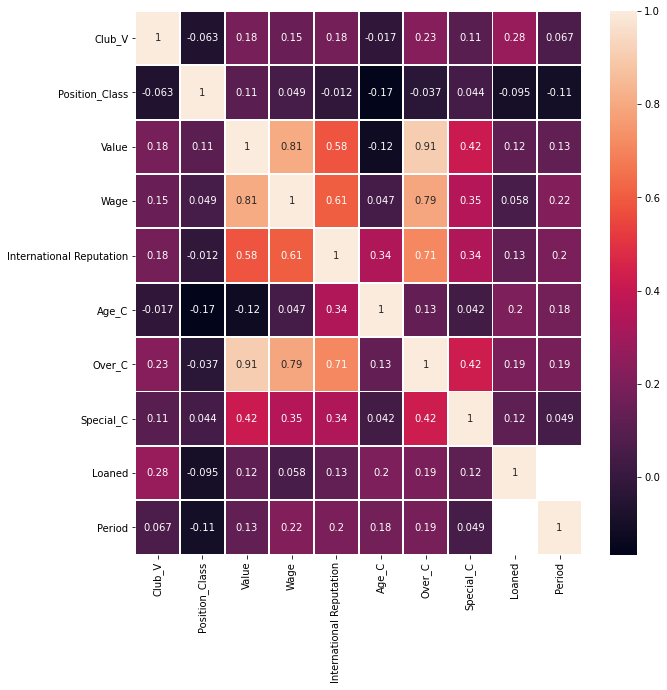

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(genius.corr(), linewidths=.8, annot=True)

In [13]:
genius.describe()

,Club_V,Position_Class,Value,Wage,International Reputation,Age_C,Over_C,Special_C,Loaned,Period
count,2031.000000,2031.000000,2.031000e+03,2031.000000,2031.000000,2031.000000,2031.000000,2031.000000,2031.000000,1810.000000
mean,2.885278,1.696701,1.171439e+07,51529.788282,1.691285,4.513048,5.291974,0.259970,0.891187,2.750442
std,0.375526,0.895299,1.229538e+07,46878.660831,0.796988,1.678230,2.185697,0.438726,0.311482,2.490551
min,0.000000,0.000000,2.100000e+05,22000.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.100000
25%,3.000000,1.000000,4.900000e+06,27000.000000,1.000000,3.000000,4.000000,0.000000,1.000000,1.000000
50%,3.000000,2.000000,8.000000e+06,36000.000000,2.000000,5.000000,5.000000,0.000000,1.000000,2.000000
75%,3.000000,2.000000,1.350000e+07,54000.000000,2.000000,5.500000,6.000000,1.000000,1.000000,3.500000
max,3.000000,3.000000,1.185000e+08,565000.000000,5.000000,11.000000,18.000000,1.000000,1.000000,16.500000


In [14]:
genius.to_csv('genius.csv')

In [17]:
wage1000=df1[df1.Wage<=1000]
wage1000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4873 entries, 276 to 18206
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Club_V                    4873 non-null   int64  
 1   Position_Class            4873 non-null   int64  
 2   Value                     4873 non-null   float64
 3   Wage                      4873 non-null   float64
 4   International Reputation  4873 non-null   float64
 5   Age_C                     4873 non-null   int64  
 6   Over_C                    4873 non-null   int64  
 7   Special_C                 4873 non-null   int64  
 8   Loaned                    4873 non-null   int64  
 9   Period                    4777 non-null   float64
dtypes: float64(4), int64(6)
memory usage: 418.8 KB


In [100]:
genius.isnull().sum()

Club_V                        0
Position_Class                0
Value                         0
Wage                          0
International Reputation      0
Age_C                         0
Over_C                        0
Special_C                     0
Loaned                        0
Period                      221
dtype: int64

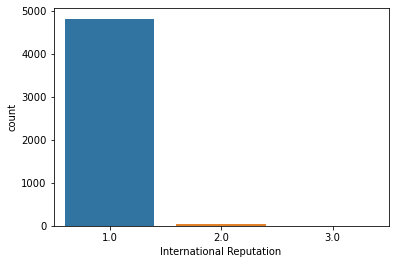

In [93]:
sns.countplot(wage1000['International Reputation'])

In [18]:
wage1000.to_csv('wage1000.csv')

In [97]:
wage1000.describe()

,Club_V,Position_Class,Value,Wage,International Reputation,Age_C,Over_C,Special_C,Loaned,Period
count,4873.000000,4873.000000,4.873000e+03,4873.0,4873.000000,4873.000000,4873.000000,4873.000000,4873.000000,4777.000000
mean,0.843423,1.425816,5.680454e+05,1000.0,1.011081,2.886518,1.432998,0.005541,0.980300,1.881662
std,0.965702,0.948102,1.390479e+06,0.0,0.114077,2.003089,0.772630,0.074237,0.138983,1.916937
min,0.000000,0.000000,0.000000e+00,1000.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.400000e+05,1000.0,1.000000,1.000000,1.000000,0.000000,1.000000,0.500000
50%,1.000000,1.000000,2.600000e+05,1000.0,1.000000,2.000000,1.000000,0.000000,1.000000,1.400000
75%,1.000000,2.000000,4.750000e+05,1000.0,1.000000,4.000000,2.000000,0.000000,1.000000,2.500000
max,3.000000,3.000000,2.100000e+07,1000.0,3.000000,11.000000,7.000000,1.000000,1.000000,20.000000


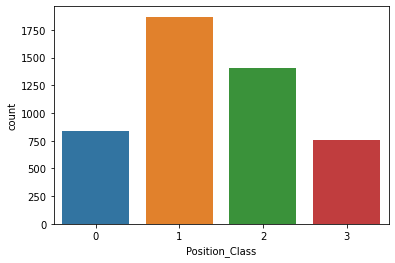

In [96]:
sns.countplot(wage1000.Position_Class)

In [101]:
wage1000.isnull().sum()

Club_V                       0
Position_Class               0
Value                        0
Wage                         0
International Reputation     0
Age_C                        0
Over_C                       0
Special_C                    0
Loaned                       0
Period                      96
dtype: int64

In [20]:
ordinary= df1[(df1.Wage>1000)&(df.Wage<21000)]
ordinary.head()

,Club_V,Position_Class,Value,Wage,International Reputation,Age_C,Over_C,Special_C,Loaned,Period
109,2,3,14000000.0,15000.0,5.0,9,10,1,1,0.8
166,3,2,36500000.0,18000.0,2.0,3,8,1,0,NaN
173,2,2,33000000.0,20000.0,3.0,3,8,1,1,0.8
226,3,1,27000000.0,11000.0,2.0,1,7,0,1,2.2
274,3,1,21000000.0,19000.0,3.0,5,7,0,1,1.9


In [21]:
ordinary.to_csv('ordinary.csv')

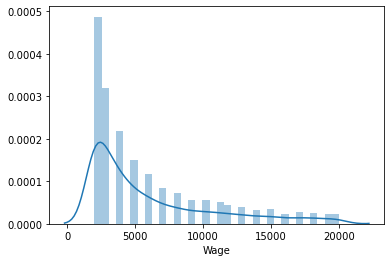

In [88]:
sns.distplot(ordinary.Wage)

In [99]:
ordinary.describe()

,Club_V,Position_Class,Value,Wage,International Reputation,Age_C,Over_C,Special_C,Loaned,Period
count,10903.000000,10903.000000,1.090300e+04,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,9968.000000
mean,1.592864,1.601853,1.530520e+06,5983.307347,1.051179,4.079519,2.356507,0.013207,0.914244,2.128471
std,1.020597,0.904170,2.102929e+06,4661.313614,0.243695,1.969173,0.963527,0.114167,0.280017,2.129203
min,0.000000,0.000000,0.000000e+00,2000.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.100000
25%,1.000000,1.000000,4.500000e+05,2000.000000,1.000000,2.000000,2.000000,0.000000,1.000000,0.500000
50%,2.000000,1.000000,8.000000e+05,4000.000000,1.000000,4.000000,2.000000,0.000000,1.000000,1.500000
75%,2.000000,2.000000,1.600000e+06,8000.000000,1.000000,5.000000,3.000000,0.000000,1.000000,2.600000
max,3.000000,3.000000,3.650000e+07,20000.000000,5.000000,11.000000,10.000000,1.000000,1.000000,27.600000


In [102]:
ordinary.isnull().sum()

Club_V                        0
Position_Class                0
Value                         0
Wage                          0
International Reputation      0
Age_C                         0
Over_C                        0
Special_C                     0
Loaned                        0
Period                      935
dtype: int64